In [12]:
from sklearn.datasets import load_iris
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA



In [10]:
# Step 1: Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 3: Drop species column (target labels)
# Note: iris.target contains species labels, but for clustering we ignore them
print("Shape before dropping species:", df.shape)


# Final dataset for clustering
X = df.copy()   # features only, no labels

print("Shape after dropping species:", X.shape)
print("\nFirst 5 rows:\n", X.head())

print(df.info())


Shape before dropping species: (150, 4)
Shape after dropping species: (150, 4)

First 5 rows:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


<h1>KMeans Clustering</h1>

Description:
  - KMeans partitions data into k clusters by iteratively assigning points to the nearest centroid and updating centroids until convergence.

Why suitable:
  -Iris dataset has 3 natural species groups, making KMeans effective for discovering clusters.

<h1>Hierarchical Clustering</h1>

Description:
  - Hierarchical clustering builds a tree (dendrogram) of clusters by merging or splitting groups step by step.

Why suitable:
  - Iris dataset is small and balanced, allowing hierarchical clustering to reveal nested relationships.

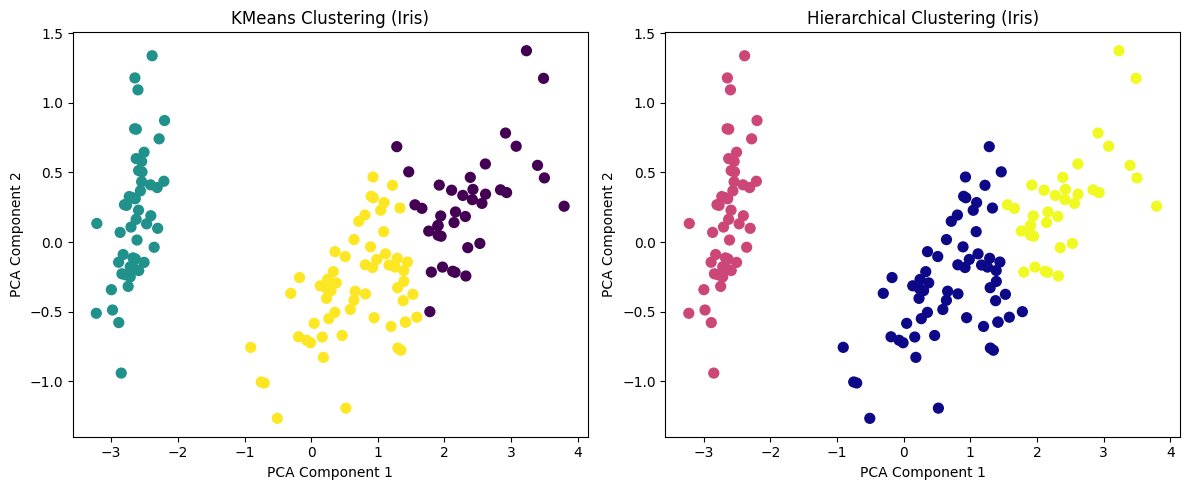

In [13]:
# -------------------------------
# 1. KMeans Clustering
# -------------------------------

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# -------------------------------
# 2. Hierarchical Clustering
# -------------------------------

hier = AgglomerativeClustering(n_clusters=3)
hier_labels = hier.fit_predict(X)

# -------------------------------
# Visualization (using PCA for 2D projection)
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,5))

# KMeans plot
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering (Iris)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Hierarchical plot
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=hier_labels, cmap='plasma', s=50)
plt.title("Hierarchical Clustering (Iris)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()
